In [121]:
# Group Number
# 21ME10093: Vasu Garg
# 
# 40
# Mushroom Classification using Decision Tree

In [122]:
# import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
# import operator
# from math import log
# from collections import Counter
# from statistics import mean
import matplotlib.pyplot as plt

In [123]:
# calculate gini index of dataset
# cycle through each attribute and do the following
#   split data by attribute value and calculate individual gini indices and take weighted average
# choose the attribute with max information gain to split on
# repeat till? information gain is 0?

In [124]:
mushrooms = pd.read_csv('mushrooms.csv')

# data split
mushrooms_train, mushrooms_rest = train_test_split(mushrooms, test_size=0.3)
mushrooms_test, mushrooms_validate = train_test_split(mushrooms_rest, test_size=0.33)

# mushrooms_train.info()
# mushrooms_test.info()
# mushrooms_validate.info()

In [125]:
# X_test = mushrooms_train.drop(['class'], axis=1)
# y_test = mushrooms_train['class']

# for index, row in X_test.iterrows():
#     for value in row:
#         print(f"{ord(value)-ord('a')+1}, {value}")

# clf = DecisionTreeClassifier()
# # clf.fit(X_test, y_test)

In [126]:
# Function to calculate gini index of mushrooms
def impurity(data):
    try:
        count_p = data['class'].value_counts()['p']
    except KeyError:
        count_p = 0
    try:
        count_e = data['class'].value_counts()['e']
    except KeyError:
        count_e = 0
    gini = 1 - (count_p/len(data))**2 - (count_e/len(data))**2
    return gini

# print(impurity(mushrooms_train))

# Get possible values of each attribute into a dict
attribute_values = {}
for column in mushrooms_train.columns:
    if column != 'class':
        attribute_values[column] = mushrooms_train[column].unique()

# print(attribute_values)

In [127]:
# function pick the attribute splitting by which resluts in minimum gini index
def attribute_choice(data):
    min_gini = 1
    for column in data.columns:
        if column != 'class':
            gini = 0
            for attribute_value in attribute_values[column]:
                if (len(data[data[column] == attribute_value]) == 0):
                    continue
                gini += impurity(data[data[column] == attribute_value]) * len(data[data[column] == attribute_value]) / len(data)
            if gini < min_gini:
                min_gini = gini
                min_gini_column = column
    return min_gini_column, min_gini

# print(attribute_choice(mushrooms_train[mushrooms_train['odor'] == 'n']))

In [128]:
# print(mushrooms_train[mushrooms_train['odor'] == 'n']['class'].value_counts())

In [129]:
decision_tree = {}

# picks best attribute at each level and recursively builds the tree
def build_tree(data):
    if (impurity(data) == 0):
        return {'class': data['class'].iloc[0]}
    attribute_name = attribute_choice(data)[0]
    return_dict = {'attribute': attribute_name}
    for attribute_value in attribute_values[attribute_name]:
        if (len(data[data[attribute_name] == attribute_value]) == 0):
            continue
        return_dict[attribute_value] = build_tree(data[data[attribute_name] == attribute_value])
    return return_dict

decision_tree = build_tree(mushrooms_train)
print(decision_tree)

{'attribute': 'odor', 'f': {'class': 'p'}, 'c': {'class': 'p'}, 'n': {'attribute': 'spore-print-color', 'h': {'class': 'e'}, 'n': {'class': 'e'}, 'k': {'class': 'e'}, 'w': {'attribute': 'habitat', 'p': {'class': 'e'}, 'd': {'attribute': 'gill-size', 'b': {'class': 'e'}, 'n': {'class': 'p'}}, 'l': {'attribute': 'cap-color', 'w': {'class': 'p'}, 'y': {'class': 'p'}, 'n': {'class': 'e'}, 'c': {'class': 'e'}}, 'g': {'class': 'e'}, 'w': {'class': 'e'}}, 'r': {'class': 'p'}, 'o': {'class': 'e'}, 'b': {'class': 'e'}, 'y': {'class': 'e'}}, 'a': {'class': 'e'}, 'p': {'class': 'p'}, 'y': {'class': 'p'}, 's': {'class': 'p'}, 'l': {'class': 'e'}, 'm': {'class': 'p'}}


In [130]:
# runs through the tree recursdively till it hits a class
def classify(tree, data):
    if ('class' in tree):
        return tree['class']
    attribute_name = tree['attribute']
    data_value = data[attribute_name]
    return classify(tree[data_value], data)

# iterating over validation set to tune pruning parameters
i = 0
for index, row in mushrooms_validate.iterrows():
    val = classify(decision_tree, row.drop('class'))
    if (row['class'] == val):
        i += 1
        
print('ID3 accuracy:', i/len(mushrooms_validate))

ID3 accuracy: 1.0


In [131]:
# accuracy check on test set
i = 0
for index, row in mushrooms_test.iterrows():
    val = classify(decision_tree, row.drop('class'))
    if (row['class'] == val):
        i += 1
        
# print('accuracy:', i, len(mushrooms_test))

In [132]:
X = mushrooms.drop(columns=['class'])
y = mushrooms['class'] 

X_encoded = pd.get_dummies(X)

encoded_data = pd.concat([X_encoded, y], axis=1)

# print(encoded_data)

encoded_data_train, encoded_data_rest = train_test_split(encoded_data, test_size=0.3)
encoded_data_test, encoded_data_validate = train_test_split(encoded_data_rest, test_size=0.33)

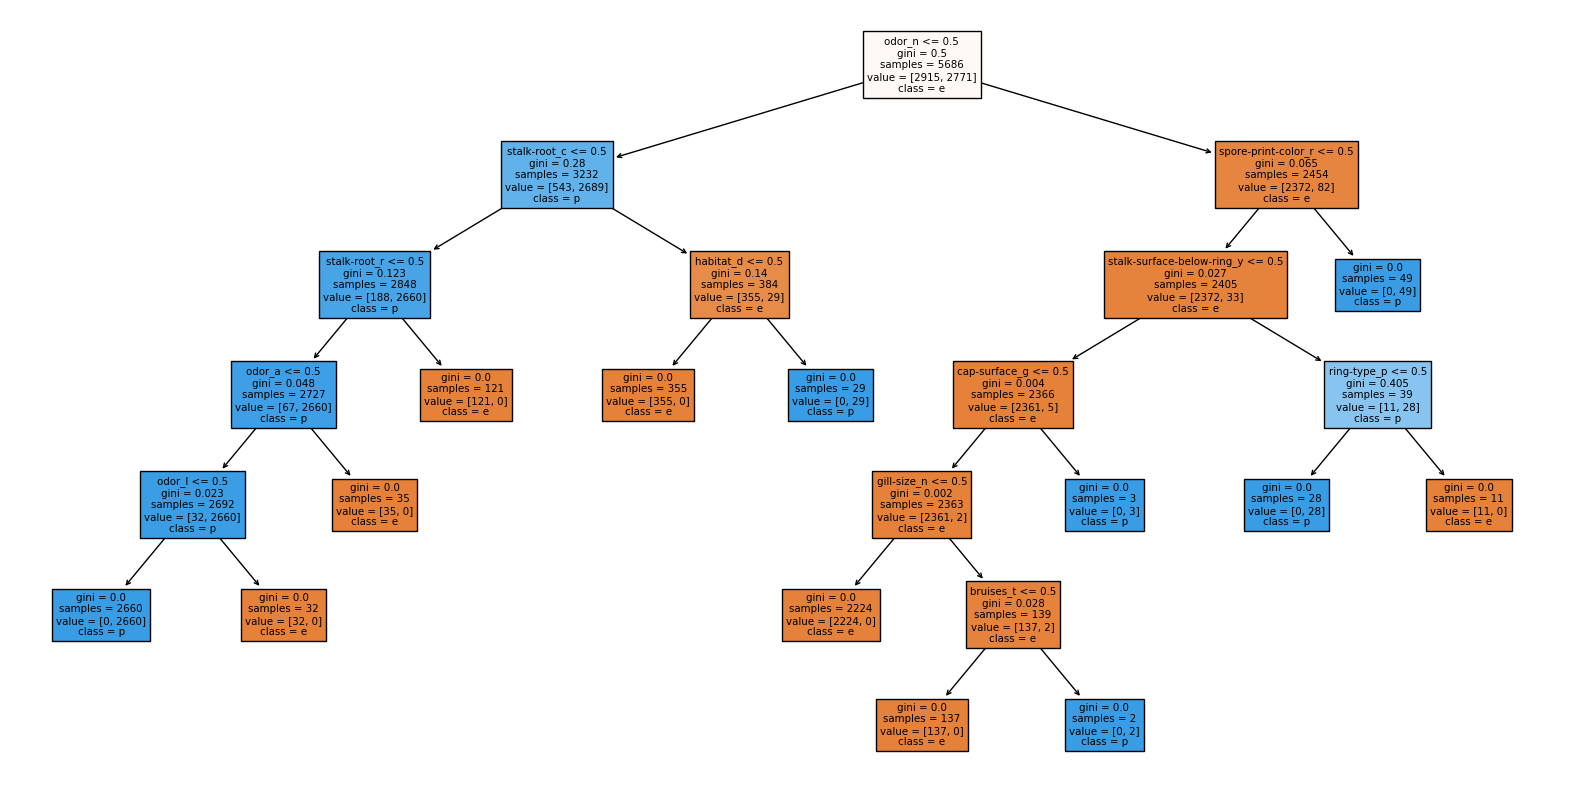

In [133]:
clf = DecisionTreeClassifier()
clf.fit(encoded_data_train.drop(columns=['class']), encoded_data_train['class'])

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=encoded_data_train.drop(columns=['class']).columns, class_names=encoded_data_train['class'].unique())
plt.show()

In [134]:
y_pred = clf.predict(encoded_data_validate.drop(columns=['class']))

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(encoded_data_validate['class'], y_pred)
# print("Validation Accuracy:", accuracy)

In [135]:
y_pred = clf.predict(encoded_data_test.drop(columns=['class']))

# Evaluate the model's performance on the test set
accuracy = accuracy_score(encoded_data_test['class'], y_pred)
print("SKlearn Test Accuracy:", accuracy)

SKlearn Test Accuracy: 1.0
